In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dfx = pd.read_csv('linearX.csv')
dfy = pd.read_csv('linearY.csv')


x = dfx.values
y = dfy.values

print(x.shape)
print(y.shape)

(99, 1)
(99, 1)


(99, 1)


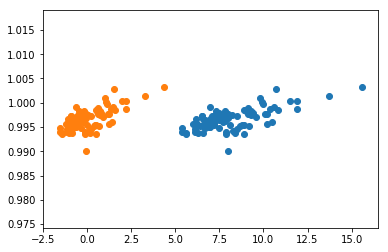

In [3]:
#  visualise and preprocess


plt.scatter(x,y)

X = (x-x.mean())/x.std()
Y = y
plt.scatter(X,y)
print(X.shape)
plt.show()

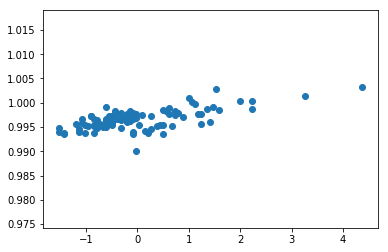

In [4]:
plt.scatter(X,Y)
plt.show()

## Gradient Algorithm
- Start with a random theta
- repeat until convergence
- Update Theta according to the rule

In [5]:
def hypothesis (x,theta):
    return theta[0] + theta[1]*x

def error(X,Y,theta):
    
    m = X.shape[0]
    
    error = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-y[i])**2
        
    return error

def gradient(X,Y,theta):
    grad = np.zeros((2,))
    m = X.shape[0]
    
    for i in range (m):
        
        hx = hypothesis(X[i],theta)
        grad[0] += (hx-Y[i])
        grad[1] += (hx -Y[i])*X[i]
    
    return grad

def gradientDescent(X,Y,learning_rate=0.001):
    error_list = []
    theta = np.zeros((2,))
    
    itr = 0
    max_itr = 100
    while(itr<=max_itr):
        
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        itr +=1
    return theta,error_list
   
        
    
        

In [6]:
final_theta,error_list = gradientDescent(X,Y,)

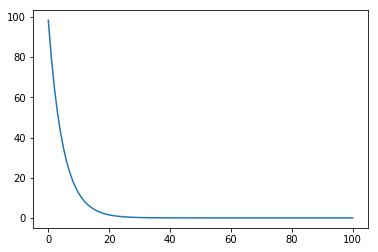

In [7]:
plt.plot(error_list)
plt.show()

In [8]:
print(final_theta)

[0.99660749 0.0013579 ]


In [9]:
## plot the line for testing data

xtest = np.linspace(-1,6,10)
print(xtest)

[-1.         -0.22222222  0.55555556  1.33333333  2.11111111  2.88888889
  3.66666667  4.44444444  5.22222222  6.        ]


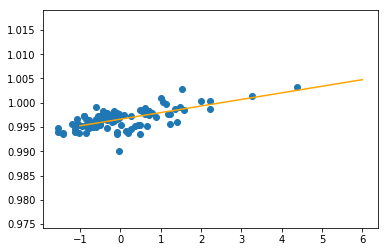

In [10]:
plt.scatter(X,Y,label='Training Data')
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label='Prediction')

In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
a = [-3,-2,-1,1,2,3]
b = a
a,b =np.meshgrid(a,b)
print(a,b)

[[-3 -2 -1  1  2  3]
 [-3 -2 -1  1  2  3]
 [-3 -2 -1  1  2  3]
 [-3 -2 -1  1  2  3]
 [-3 -2 -1  1  2  3]
 [-3 -2 -1  1  2  3]] [[-3 -3 -3 -3 -3 -3]
 [-2 -2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1]
 [ 2  2  2  2  2  2]
 [ 3  3  3  3  3  3]]


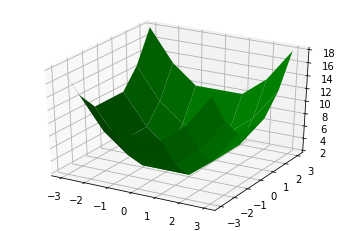

In [13]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(a,b,a**2+b**2,color='green')
plt.show()

/home/maut/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'color'
  s)


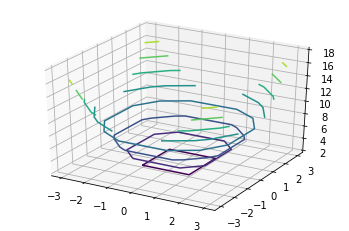

In [14]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(a,b,a**2+b**2,color='green')
plt.show()

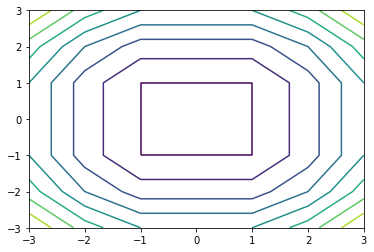

In [15]:
plt.contour(a,b,a**2+b**2)
plt.show()